# How to use PolySMILES

In [1]:
#load module
import sys
sys.path.append("polysmiles")
from PolySMILES import PolySMILES
from polymer_graph_helper import draw_chem_graph

# Summary

In [2]:
psm=PolySMILES()

smiles_list=['[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1',
             '[Q]CC([Q: n=3][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1',
             '[Q]CC([Q: n=3][Q: connect = mix]CCO[Q: n=20][H])C1=CC=CC=C1',
             "C",
             "CC",
             "CCC",
             "awfds"    # this is an invalid smiles
            ]

psm.auto(smiles_list)

6  error! awfds


,SMILES,total MW,JR_BoilingPoint,JR_MeltingPoint,JR_CriticalTemp,JR_CriticalPress,JR_CriticalVolume,JR_EnthalpyForm,JR_GibbsEnergy,JR_HeatCapacity,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20...,4025.78,393.251171,198.903297,592.11695,41.223225,328.712799,-31.225576,61.787303,114.900843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[Q]CC([Q: n=3][Q: connect = block]CCO[Q: n=20]...,1213.676,356.019472,181.672355,530.159268,52.145356,220.306209,-168.637413,-93.690569,81.282295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[Q]CC([Q: n=3][Q: connect = mix]CCO[Q: n=20][H...,1213.676,356.019472,181.672355,530.159268,52.145356,220.306209,-168.637413,-93.690569,81.282295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C,16.043,198.2,122.5,339.383562,60.092543,17.5,68.29,53.88,-4.620864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CC,30.07,245.36,112.3,401.954229,50.299281,147.5,-84.61,-34.04,51.619421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CCC,44.097,268.24,123.57,427.656009,44.091011,203.5,-105.25,-25.62,74.5044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# fingerprint mode (avalon fp as default)


In [3]:
from AutoDescriptor import AutoFingerprint
psm=PolySMILES(calculator=AutoFingerprint())
psm.auto(smiles_list)

6  error! awfds


,SMILES,total MW,FP0,FP1,FP2,FP3,FP4,FP5,FP6,FP7,...,FP502,FP503,FP504,FP505,FP506,FP507,FP508,FP509,FP510,FP511
0,[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20...,4025.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[Q]CC([Q: n=3][Q: connect = block]CCO[Q: n=20]...,1213.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[Q]CC([Q: n=3][Q: connect = mix]CCO[Q: n=20][H...,1213.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C,16.043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CC,30.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CCC,44.097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Other useages
- Initiate PolySMILES class
- call "smiles_to_dict" method
    - Returning processed data as a dict object
    - Parse data to yield fragmented repeating units

In [4]:
smiles='[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1'
psm.smiles_to_dict(smiles,calculate_descriptor=False)

{0: {'connect': 'block-block',
  'n': 30.0,
  'SMILES': '[Q]CC(c:1:c:c:c:c:c1)[Q]',
  'mw_unit': 104.15200000000004,
  'type': 'polymeric',
  'mn': 3124.5600000000013},
 1: {'connect': 'block-block',
  'n': 20.0,
  'SMILES': '[Q]CCO[QH]',
  'mw_unit': 45.06100000000001,
  'type': 'polymeric',
  'mn': 901.2200000000001}}

# Calculate descriptors
- RDKit desctiptors are set as default
- Repeating units are capped with "H" for calculation, as default (cap_atom="H")
- NaN will be replaced with zeros, as default (fill_nan=0)

In [5]:
#calculate descriptors as the weight average of each unit
#if molecular weight of the polymer is not given, n will be 50 (default_n=50)
psm.smiles_to_weighted_descriptors(smiles)

{'SMILES': '[Q]CC([Q: n=30][Q: connect = block]CCO[Q: n=20][H])C1=CC=CC=C1',
 'total MW': 4025.7800000000016,
 'FP0': 0.0,
 'FP1': 0.0,
 'FP2': 0.0,
 'FP3': 0.0,
 'FP4': 0.0,
 'FP5': 0.0,
 'FP6': 0.0,
 'FP7': 0.0,
 'FP8': 0.0,
 'FP9': 0.0,
 'FP10': 0.0,
 'FP11': 0.0,
 'FP12': 0.0,
 'FP13': 0.0,
 'FP14': 0.0,
 'FP15': 0.0,
 'FP16': 0.0,
 'FP17': 0.0,
 'FP18': 0.0,
 'FP19': 0.0,
 'FP20': 0.0,
 'FP21': 0.0,
 'FP22': 0.0,
 'FP23': 0.0,
 'FP24': 0.0,
 'FP25': 0.0,
 'FP26': 0.0,
 'FP27': 0.0,
 'FP28': 0.0,
 'FP29': 0.0,
 'FP30': 0.0,
 'FP31': 0.0,
 'FP32': 0.0,
 'FP33': 0.0,
 'FP34': 0.0,
 'FP35': 0.0,
 'FP36': 0.0,
 'FP37': 0.0,
 'FP38': 0.0,
 'FP39': 0.0,
 'FP40': 0.0,
 'FP41': 0.0,
 'FP42': 0.22386220806899526,
 'FP43': 0.0,
 'FP44': 0.0,
 'FP45': 0.0,
 'FP46': 0.0,
 'FP47': 0.0,
 'FP48': 0.0,
 'FP49': 0.0,
 'FP50': 0.0,
 'FP51': 0.0,
 'FP52': 0.0,
 'FP53': 0.0,
 'FP54': 0.0,
 'FP55': 0.0,
 'FP56': 0.0,
 'FP57': 0.0,
 'FP58': 0.0,
 'FP59': 0.0,
 'FP60': 0.0,
 'FP61': 0.0,
 'FP62': 0.0,
 '

# Rules for expressing structures

<img src="pics/polymer_expression.PNG" width=600>

<img src="pics/molecular_weight.PNG" width=300>

# Show graph (under construction)
- As a NetworkX object

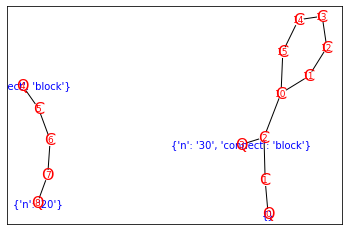

In [6]:
g,_=psm.smiles_to_dict(smiles,graph_mode=True)
draw_chem_graph(g)